# Boston House price prediction

<h2>1.1 Boston Dataset Description</h2>

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<h2>1.2 Splitting our data into train and test</h2>

In [0]:
bos= load_boston()
X=pd.DataFrame(bos.data, columns = bos.feature_names)
Y=pd.DataFrame(bos.target,columns=["PRICE"])
#https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python
X = (X - X.mean())/X.std()

In [4]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train["PRICE"] = y_train

(354, 13) (152, 13) (354, 1) (152, 1)


<h2>1.3 Stochastic Gradient Decent(SGD) for Linear Regression</h2>


In [0]:
#first we will randomly choose the w,b
W= np.random.rand(13)
w=np.asmatrix(W).T
b = np.random.rand()

In [0]:
#this function caliculates m*x+c
def f(x,m,c):
    return np.dot(x,m)+c

In [0]:
#As we will not take the entire train data we will take the subset.
#https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python
def batch():    
    batch_sample = x_train.sample(155)
    y_obs = np.asarray(batch_sample["PRICE"])
    x = np.asmatrix(batch_sample.drop("PRICE", axis = 1))
    return x,y_obs

In [0]:
#This is our sgd algorithm
#https://www.youtube.com/watch?v=IxBYhjS295w
#https://github.com/sachinruk/deepschool.io
def sgd(iter=1000,gamma=0.001): #here gamma is r
    loss = np.zeros((iter,1))
    w=np.asmatrix(W).T
    params = []
    b = np.random.rand()
    i=0
    dl_dw=0;
    dl_db=0;
    while(i<iter):#This loop is for 1000 itereations
        j=0;
        x_train_r,y_obs=batch()
        length=len(x_train_r)
        while(j<length):#this loop iterates through every point in xi in batched  training data
            diff=y_obs[j]-f(x_train_r[j],w,b)
            temp1=np.dot((-2*x_train_r[j].T),diff)
            dl_dw=dl_dw+temp1
            temp2=y_obs[j]-f(x_train_r[j],w,b)
            temp2=-2*diff
            dl_db=dl_db+temp2
            j=j+1
        w=w-gamma*dl_dw
        b=b-gamma*dl_db
        loss[i]=mean_squared_error(y_test,(np.dot(np.asmatrix(x_test), w) + b))
        params.append(w)
        gamma=gamma/2
        i=i+1
    return params,b,loss

In [0]:
params,b,loss=sgd()

In [21]:
print("The best w is\n",params[-1])
print("************************************")
print("The best b is\n",b)

The best w is
 [[-0.48770419]
 [ 0.23806568]
 [-0.21880318]
 [ 0.89118377]
 [-0.34196677]
 [ 2.93263604]
 [ 0.04461172]
 [-1.11735731]
 [-0.23660887]
 [-0.50260475]
 [-1.00582152]
 [ 0.90476494]
 [-3.14311614]]
************************************
The best b is
 [[20.92578337]]


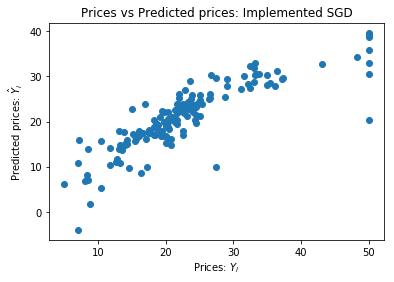

In [22]:
# Scatter plot of test vs predicted
# Implemented SGD

plt.scatter(y_test,[(np.dot(np.asmatrix(x_test), params[-1]) + b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

In [23]:
print("the mean squared error of Sklearn SGDRegressor is:")
mean_squared_error(y_test,(np.dot(np.asmatrix(x_test), params[-1]) + b))

the mean squared error of Sklearn SGDRegressor is:


27.800804001749697

<h2>1.4 SKlearn SGDRegressor</h2>

In [0]:
dummy=x_train
dummy = np.asmatrix(dummy.drop("PRICE", axis = 1))

In [0]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(dummy, y_train)
y_pred = clf.predict(x_test)

In [26]:
#i used this code from our sample example of LinearRegression
m=clf.coef_.T
print("The best w is\n",m.T)
print("************************************")
print("The best b is\n",clf.intercept_)

The best w is
 [-0.93414113  0.86985801  0.51996617  0.65028112 -2.40048455  2.77983085
 -0.05973291 -2.90477811  2.69006155 -2.08512739 -2.22713535  0.86824944
 -3.56068986]
************************************
The best b is
 [22.47814738]


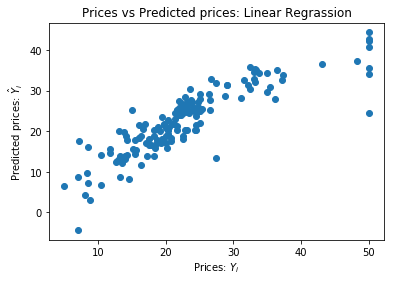

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Linear Regrassion")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
print("the mean squared error of Sklearn SGDRegressor is:")
print(mean_squared_error(y_test, y_pred))


the mean squared error of Sklearn SGDRegressor is:
22.07477638853445


<h2>1.5 Comparing SKLearn SGDRegressor with our SGD(implemented)</h2>

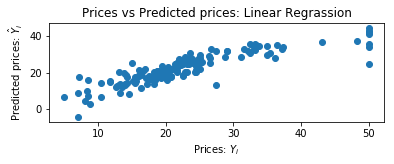

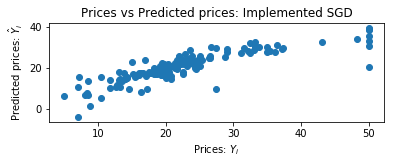

In [29]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Linear Regrassion")
plt.show()

# Implemented SGD
plt.subplot(212)
plt.scatter(y_test, [(np.dot(np.asmatrix(x_test), params[-1]) + b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

 **observation**



1.   Both my w are almost similar i.e im getting my w vector almost similar tin my implemented SGD and Linear Regression.
2.   And also my both y-intercepts are also almost same.
4.From these results i can say that sklearn.LinearRegression() implemnts SGD to find my best W, b
 to fit the best line for the given data.


In [30]:
# pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
print("\t\tComparing W's")
x.field_names = ["w of implemented SGD","w of sklearn SGD"]
ele=0;
while(ele<13):
    x.add_row([params[-1][ele][0],[[clf.coef_[ele]]]])
    ele=ele+1;
print(x)

		Comparing W's
+----------------------+---------------------------+
| w of implemented SGD |      w of sklearn SGD     |
+----------------------+---------------------------+
|   [[-0.48770419]]    |  [[-0.9341411262692196]]  |
|    [[0.23806568]]    |   [[0.869858008213496]]   |
|   [[-0.21880318]]    |   [[0.5199661692999241]]  |
|    [[0.89118377]]    |   [[0.6502811174307473]]  |
|   [[-0.34196677]]    |   [[-2.400484545929108]]  |
|    [[2.93263604]]    |   [[2.779830851093292]]   |
|    [[0.04461172]]    | [[-0.059732909913560964]] |
|   [[-1.11735731]]    |   [[-2.904778105306144]]  |
|   [[-0.23660887]]    |   [[2.6900615538949424]]  |
|   [[-0.50260475]]    |  [[-2.0851273871712284]]  |
|   [[-1.00582152]]    |  [[-2.2271353495486634]]  |
|    [[0.90476494]]    |   [[0.8682494362104586]]  |
|   [[-3.14311614]]    |  [[-3.5606898636966102]]  |
+----------------------+---------------------------+


In [31]:
# pretty table http://zetcode.com/python/prettytable/
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["MSE of SGDRegressor","MSE OF Implemented SGD"]
x.add_row([mean_squared_error(y_test, y_pred),mean_squared_error(y_test,(np.dot(np.asmatrix(x_test), params[-1]) + b))])
print(x)

+---------------------+------------------------+
| MSE of SGDRegressor | MSE OF Implemented SGD |
+---------------------+------------------------+
|  22.07477638853445  |   27.800804001749697   |
+---------------------+------------------------+


<h2>1.6 Plotting PDF for errors of our implemented SGD</h2>

In [0]:
Y_pred_imp=(np.dot(np.asmatrix(x_test), params[-1]) + b)
y_test=np.asarray(y_test)

In [0]:
i=0;
diff1=[]
diff2=[]
while(i<152):
  diff1.append(float(y_test[i])-float(Y_pred_imp[i]))
  diff2.append(float(y_test[i]-float(y_pred[i])))
  i=i+1

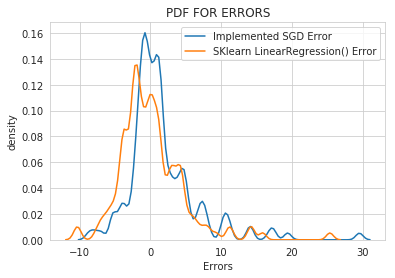

In [48]:
import statistics
#I'm making use of this code from our sample example
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(diff1), bw=0.5,label='Implemented SGD Error')
sns.kdeplot(np.array(diff2), bw=0.5,label='SKlearn LinearRegression() Error')
plt.xlabel("Errors")
plt.ylabel("density")
plt.legend()
plt.title("PDF FOR ERRORS")
plt.show()

<h3>Observation:</h3>


1.   we are very much close to our actuall linearregrassion model whish we can see in the above pdf
2.   From the above plot we can say that a lot our errors are concentrated around Zero.


<h2>Final Observations:</h2>


1.   From the above plot we can say that a lot our errors are concentrated around Zero.
2.   any measure of central tendancy could be some where around zero.
3.   we are very much close to our actuall linearregrassion model whish we can see in the above pdf.
4.  measure of central tendancy mean for errors of our implemnted sgd is very much close mean for errors of LinearRegression() 
5.  measure of central tendancy median for errors of our implemnted sgd is also close to median for errors of LinearRegression()